In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Although we are easly plot with seaborn matplotlib helps to change figure size
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('Import libraries sucessfully !!')

Import libraries sucessfully !!


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
771,772,0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S


# 1. Categorical Data

## a. Countplot

<AxesSubplot:xlabel='Survived', ylabel='count'>

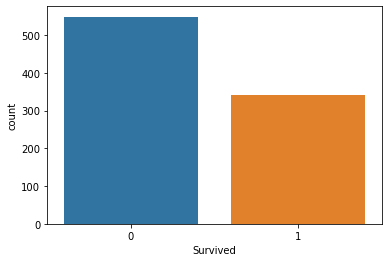

In [12]:
sns.countplot(df.Survived)

<AxesSubplot:>

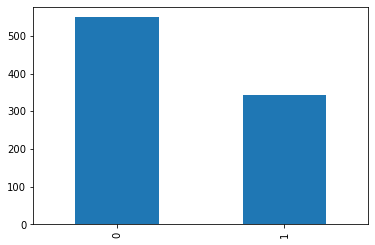

In [13]:
df.Survived.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

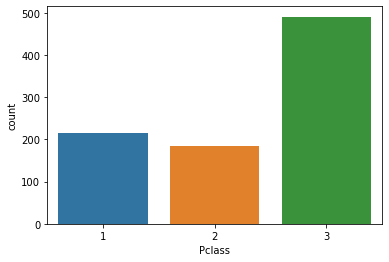

In [14]:
sns.countplot(df.Pclass)

<AxesSubplot:xlabel='Sex', ylabel='count'>

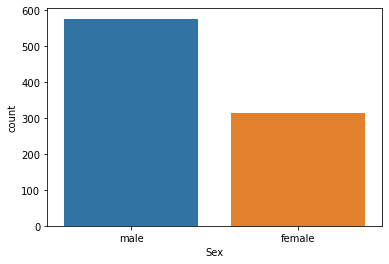

In [15]:
sns.countplot(df.Sex)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

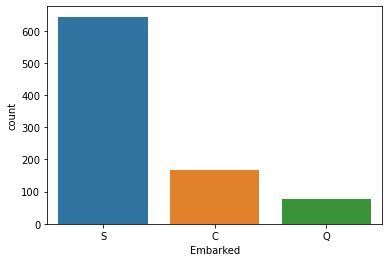

In [16]:
sns.countplot(df.Embarked)

## b. PieChart

<AxesSubplot:ylabel='Survived'>

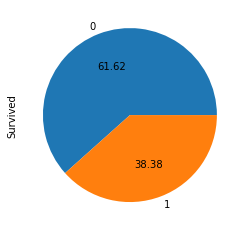

In [17]:
df.Survived.value_counts().plot(kind='pie',autopct='%.2f')

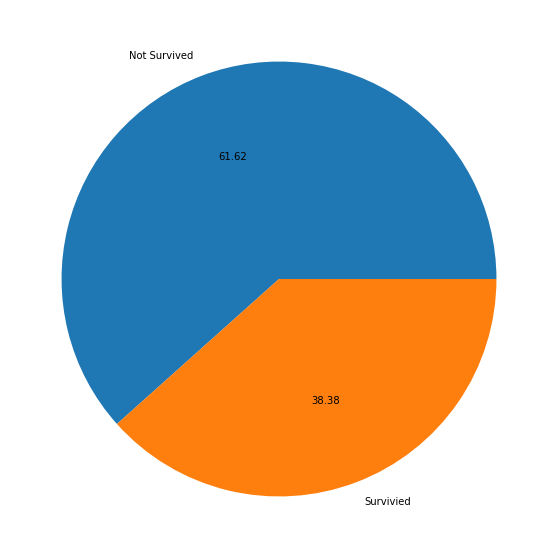

In [18]:
plt.figure(figsize=(20,10))

plt.pie(df.Survived.value_counts(),labels=['Not Survived','Survivied'],autopct='%.2f')
plt.show()

<AxesSubplot:ylabel='Pclass'>

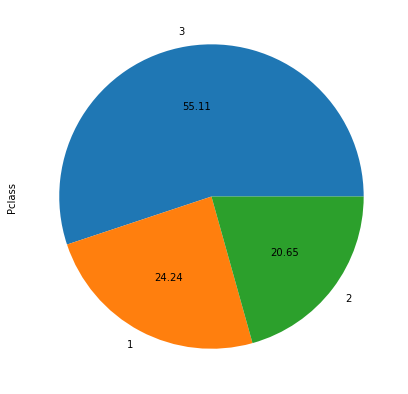

In [19]:
plt.figure(figsize=(15,7))
df.Pclass.value_counts().plot(kind='pie',autopct='%.2f')

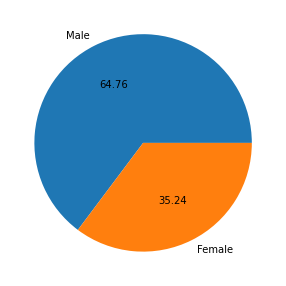

In [20]:
plt.figure(figsize=(10,5))

plt.pie(df.Sex.value_counts(),labels=['Male','Female'],autopct='%.2f')
plt.show()

# 2. Numerical Data

## a. Histogram

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

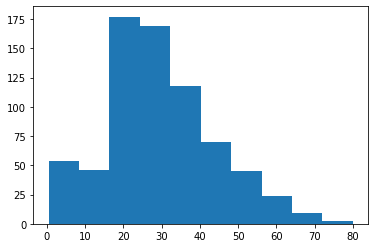

In [24]:
plt.hist(df.Age)
#plt.show()

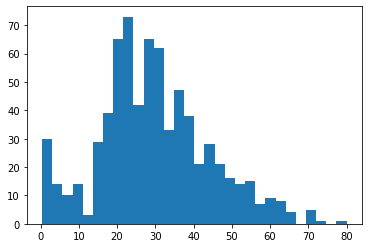

In [27]:
plt.hist(df.Age,bins=30)
plt.show()

## b. Distplot

<AxesSubplot:xlabel='Age', ylabel='Density'>

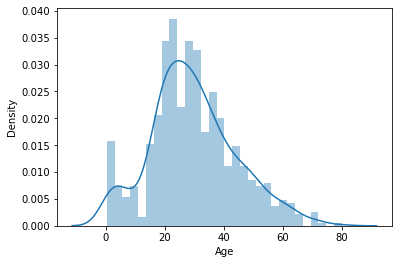

In [32]:
sns.distplot(df.Age,bins=30)
# we want calcualte probability of paticular age shown in y axis

### displot also describe skewness of data

In [30]:
dir(plt)
# to find number of function/object in a module

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '_IoffContext',
 '_IonContext',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setup_pyplot_info_doc

## c. Boxplot

<AxesSubplot:xlabel='Age'>

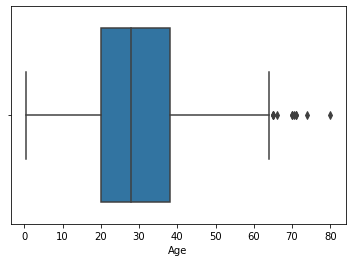

In [34]:
sns.boxplot(df.Age)

<AxesSubplot:xlabel='Fare'>

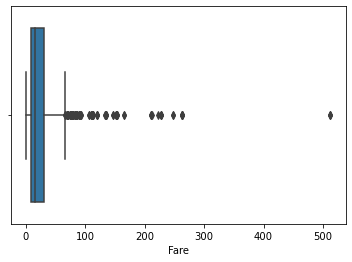

In [35]:
sns.boxplot(df.Fare)

<AxesSubplot:xlabel='Age'>

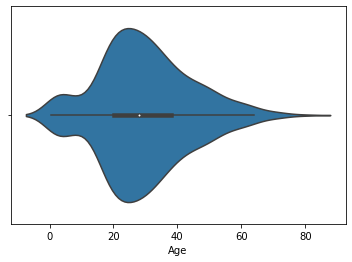

In [36]:
sns.violinplot(df.Age)

<AxesSubplot:xlabel='Age'>

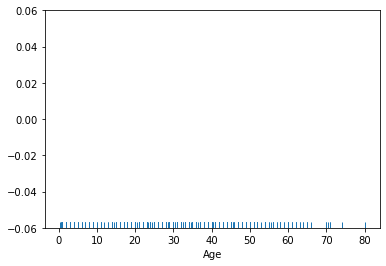

In [37]:
sns.rugplot(df.Age)

In [38]:
df.Age.min()

0.42

In [39]:
df.Age.max()

80.0

In [40]:
df.Age.mean()

29.69911764705882

In [41]:
df.Age.median()

28.0

In [42]:
df.Age.std()

14.526497332334044

In [43]:
df.Age.var()

211.0191247463081

In [44]:
df.Age.mode()

0    24.0
Name: Age, dtype: float64

In [45]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [46]:
df.Age.skew()

0.38910778230082704

In [51]:
df.cov()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,66231.000000,-0.626966,-7.561798,138.696504,-16.325843,-0.342697,161.883369
Survived,-0.626966,0.236772,-0.137703,-0.551296,-0.018954,0.032017,6.221787
Pclass,-7.561798,-0.137703,0.699015,-4.496004,0.076599,0.012429,-22.830196
Age,138.696504,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
SibSp,-16.325843,-0.018954,0.076599,-4.163334,1.216043,0.368739,8.748734
Parch,-0.342697,0.032017,0.012429,-2.344191,0.368739,0.649728,8.661052
Fare,161.883369,6.221787,-22.830196,73.849030,8.748734,8.661052,2469.436846
